## Visualizations of Frequent Words 

Show frequent words per topic

In [1]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

from pyspark.sql.functions import desc

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
database = "analysisDB"
collection = "covid_wc" # covid_wc | blm_wc
hashtag_file = '../hashtags/covid.txt' # ../hashtags/covid.txt | ../hashtags/blm.txt

In [3]:
spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config("spark.mongodb.input.uri=mongodb://mongo:27017/"+database+"."+collection) \
    .config("spark.mongodb.output.uri=mongodb://mongo:27017/"+database+"."+collection) \
    .config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.11:2.3.2') \
    .getOrCreate()

sc = spark.sparkContext

In [4]:
df = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri","mongodb://mongo:27017/"+database+"."+collection).load()
df.columns

['_id', 'count']

In [5]:
df.sort(desc('count')).show()

+-----------+------+
|        _id| count|
+-----------+------+
|        the|388957|
|         to|275244|
|      covid|253787|
|         of|227555|
|         in|195554|
|        and|178520|
|          a|166125|
|         is|128709|
|        for|104158|
|         on| 90436|
|         we| 78003|
|        are| 73408|
|coronavirus| 72227|
|       this| 70860|
|       with| 66335|
|          i| 63181|
|         be| 60016|
|         dd| 57561|
|       that| 57172|
|        you| 55446|
+-----------+------+
only showing top 20 rows



In [6]:
file = open(hashtag_file, 'r')
hashtags = [line.replace('\n', '').strip().replace('#','') for line in file.readlines()]
hashtags

['covid19',
 'corona',
 'covid',
 'coronavirus',
 'covid2019',
 'covid-19',
 'covid_19',
 'coronavirusupdate',
 'coronavirus2019',
 'coronavirus_2019']

In [7]:
top_words_list = [i._id for i in df.sort(desc('count')).collect()[:1000]]
top_words_list[:10]

['the', 'to', 'covid', 'of', 'in', 'and', 'a', 'is', 'for', 'on']

In [8]:
# Remove stopwords or hashtags
filtered_top_words = [word for word in top_words_list if word not in stopwords.words('english')]
filtered_top_words = [word for word in filtered_top_words if word not in hashtags]
filtered_top_words[:10]

['dd',
 'amp',
 'cases',
 'dc',
 'new',
 'one',
 'people',
 'us',
 'country',
 'pandemic']

In [9]:
wordcount_dict = {}

for word in filtered_top_words[:40]:
    wordcount_dict[word] = df.filter(df['_id'] == word).collect()[0]['count']
#     wordcount_dict_list.append({word: })

wordcount_dict

{'dd': 57561,
 'amp': 52283,
 'cases': 43403,
 'dc': 39470,
 'new': 38668,
 'one': 33528,
 'people': 28687,
 'us': 28555,
 'country': 24191,
 'pandemic': 23448,
 'today': 19930,
 'lockdown': 19657,
 'health': 19534,
 'de': 19104,
 'pretend': 18157,
 'wish': 17951,
 'advanced': 17596,
 'lived': 17536,
 'deaths': 17017,
 'uk': 16522,
 'says': 15794,
 'total': 15568,
 'many': 15348,
 'day': 15232,
 'world': 14578,
 'time': 14010,
 'like': 13369,
 'june': 13139,
 'go': 12967,
 'government': 12693,
 'states': 12319,
 'help': 12163,
 'need': 11915,
 'due': 11338,
 'fef': 11277,
 'week': 11237,
 'positive': 11143,
 'patients': 11090,
 'know': 10842,
 'may': 10815}

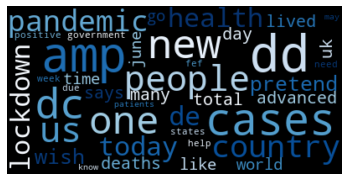

In [10]:
# Generate wordcloud
wordcloud = WordCloud(background_color="black", max_font_size=60, colormap="Blues")
wordcloud.generate_from_frequencies(frequencies=wordcount_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()